[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# RD performance in IPP video coding

This notebook runs different IPP... experiments. The first one, implemented in `image_IPP.py` is a simple IPP... video codec without macro-blocks (MBs) MB-type RDO. All MBs are motion compensated as P-type blocks.  The second one, implemented in `image_IPP_adaptive.py`, is identical to `image_IPP.py`, but MB-type RDO is used (depending on the RD slope of the differerent MB types). S/P/I-type MBs are used. Finally, the RD curves are compared to MP4, using intra-mode.

In [1]:
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/quantization/distortion.py .
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/midtread_quantizer.py .

### Prepare the sequence

In [2]:
!rm /tmp/*.png

In [3]:
N_frames = 5 # Min val 3

In [4]:
prefix = "https://media.xiph.org/video/derf/y4m/"
sequence = "bus_cif.y4m"
#sequence = "akiyo_cif.y4m"
#sequence = "football_422_ntsc.y4m"
first_frame = 0

In [5]:
sequence = "stockholm_1280x768x50x420x578.avi"
prefix = "http://www.hpca.ual.es/~vruiz/videos/"
first_frame = 2

In [6]:
number_of_frames_to_extract = first_frame + N_frames
!../sequences/extract_frames.sh -i $prefix -s $sequence -n $number_of_frames_to_extract

input prefix = http://www.hpca.ual.es/~vruiz/videos/
sequence file name = stockholm_1280x768x50x420x578.avi
number of frames to extract = 7
/home/vruiz/MRVC/sequences/stockholm_1280x768x50x420x578.avi exists. Only extracting ...
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh 

## Testing `image_IPP`

### Select `image_IPP` codec in `config.py`
All MBs in P-frames are P-MBs.

In [7]:
!sed -z -i 's/\n#temporal_codec = "image_IPP"\n/\ntemporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "image_IPP_adaptive"\n/\n#temporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "MP4"\n/\n#temporal_codec = "MP4"\n/g' config.py

In [8]:
!cat -n config.py | grep "temporal_codec" 

    29	temporal_codec = "image_IPP"
    30	#temporal_codec = "image_IPP_adaptive"
    31	#temporal_codec = "MP4"


### Select the spatial+entropy codec
We use MP4 and therefore, no previous spatial transform is used. MP4 uses the DCT.

In [9]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [10]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


### Select the color transform

In [11]:
!sed -z -i 's/\ncolor = "YCoCg"\n/\n#color = "YCoCg"\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg"\n/\n#color = "YCoCg"\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg"\n/\ncolor = "YCoCg"\n/g' config.py

In [12]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


### Select the spatial codec

In [13]:
!sed -z -i 's/\nspatial_codec = "Q+PNG"\n/\n#spatial_codec = "Q+PNG"\n/g' config.py
!sed -z -i 's/\nspatial_codec = "H264"\n/\n#spatial_codec = "H264"\n/g' config.py
!sed -z -i 's/\n#spatial_codec = "DCT"\n/\nspatial_codec = "DCT"\n/g' config.py

In [14]:
!cat -n config.py | grep "spatial_codec" 

    10	#spatial_codec = "Q+PNG"
    11	#spatial_codec = "H264"
    12	spatial_codec = "DCT"


### Select quantization range

In [15]:
!sed -z -i 's/\nQ_steps = range(42, 21, -3)\n/\n#Q_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/\nQ_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [16]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 41, -3)
    23	#Q_steps = range(42, 21, -3)
    26	Q_steps = [128]
    27	Q_steps = [128, 64, 32, 16, 8]


### Run the codec

In [17]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=$first_frame --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_002.png
** Processing: /tmp/original_texture_002.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 130 colors in palette
Input IDAT size = 18186 bytes
Input file size = 18267 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 10957
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 10957

Output IDAT size = 10957 bytes (7229 bytes decrease)
Output file size = 11416 bytes (6851 bytes = 37.50% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_002.png (768, 1280, 3) uint8 11416 137 112
[image_3.py:68 debug_write() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 177777 248 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_IPP.py:73 encode() DEBUG] W_k 34 -

[image_1.py:47 write() INFO] image_1.write: /tmp/original_motion_x_diff_comp_005.png (48, 80) uint8 383 130 125
[image_1.py:28 read() DEBUG] /tmp/original_motion_x_006.png (48, 80) uint8 416 132 128
[image_1.py:42 write() DEBUG] optipng /tmp/original_motion_x_diff_comp_006.png
** Processing: /tmp/original_motion_x_diff_comp_006.png
80x48 pixels, 8 bits/pixel, grayscale
Reducing image to 4 bits/pixel, 7 colors in palette
Input IDAT size = 402 bytes
Input file size = 459 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 323
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 309
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 309

Output IDAT size = 309 bytes (93 bytes decrease)
Output file size = 399 bytes (60 bytes = 13.07% decrease)

[image_1.py:47 write() INFO] image_1.write: /tmp/original_motion_x_diff_comp_006.png (48, 80) uint8 399 131 125
[image_IPP.py:205 compute_br_DCT() DEBUG] cat /tmp/original_motion_x_diff_comp_???.png | 

[image_3.py:68 debug_write() INFO] /tmp/original_prediction_error_006.png (768, 1280, 3) uint8 1498584 255 0
[image_IPP.py:388 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=6 Q_step=128
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_006.png
** Processing: /tmp/original_texture_006.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 4 bits/pixel, 7 colors in palette
Input IDAT size = 6508 bytes
Input file size = 6565 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 2882
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 2879
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 2879

Output IDAT size = 2879 bytes (3629 bytes decrease)
Output file size = 2969 bytes (3596 bytes = 54.78% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_006.png (768, 1280, 3) uint8 2969 130 126
[image_3.py:68 debug_write() INFO] /tmp/original_dequantized_prediction_error_006.png (768, 1280, 3) uint8 50373 196 74
[image

  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 67987
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 67987

Output IDAT size = 67987 bytes (21077 bytes decrease)
Output file size = 68044 bytes (21197 bytes = 23.75% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_002.png (768, 1280, 3) uint8 68044 167 64
[image_3.py:68 debug_write() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 636204 255 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_IPP.py:73 encode() DEBUG] W_k 34 -28
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 5.38530158996582 -1.734867811203003
[image_1.py:35 debug_write() INFO] image_1.write: /tmp/original_motion_x_003.png (48, 80) uint8 425 132 128
[image_1.py:35 debug_write() INFO] image_1.write: /tmp/original_motion_y_003.png (48, 80) uint8 99 128 128
[image_IPP.py:78 encode() DEBUG] USED flow 4 -1
[image_3.py:68 debug_write() INFO] /tmp/original_pre

** Processing: /tmp/original_motion_x_diff_comp_006.png
80x48 pixels, 8 bits/pixel, grayscale
Reducing image to 4 bits/pixel, 7 colors in palette
Input IDAT size = 402 bytes
Input file size = 459 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 323
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 309
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 309

Output IDAT size = 309 bytes (93 bytes decrease)
Output file size = 399 bytes (60 bytes = 13.07% decrease)

[image_1.py:47 write() INFO] image_1.write: /tmp/original_motion_x_diff_comp_006.png (48, 80) uint8 399 131 125
[image_IPP.py:205 compute_br_DCT() DEBUG] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:211 compute_br_DCT() INFO] motion (X direction): 1090 bytes, 52.32 KBPS, 0.0005913628472222222 BPP
[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:41 read() INFO] /tmp/original_r

[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_006.png
** Processing: /tmp/original_texture_006.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 43 colors in palette
Input IDAT size = 39797 bytes
Input file size = 39902 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 22543
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 22381
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 21721
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 21721

Output IDAT size = 21721 bytes (18076 bytes decrease)
Output file size = 21919 bytes (17983 bytes = 45.07% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_006.png (768, 1280, 3) uint8 21919 133 120
[image_3.py:68 debug_write() INFO] /tmp/original_dequantized_prediction_error_006.png (768, 1280, 3) uint8 333980 227 53
[image_3.py:68 debug_write() INFO] /tmp/original_reconstructed_006.png (768, 1280, 3) uint8 927244 255 0
[image_3.py:41 read() INFO] /tm

  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 268888
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 268888

Output IDAT size = 268888 bytes (68989 bytes decrease)
Output file size = 268945 bytes (69481 bytes = 20.53% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_002.png (768, 1280, 3) uint8 268945 255 0
[image_3.py:68 debug_write() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 1136188 255 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_IPP.py:73 encode() DEBUG] W_k 34 -28
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 5.38530158996582 -1.734867811203003
[image_1.py:35 debug_write() INFO] image_1.write: /tmp/original_motion_x_003.png (48, 80) uint8 425 132 128
[image_1.py:35 debug_write() INFO] image_1.write: /tmp/original_motion_y_003.png (48, 80) uint8 99 128 128
[image_IPP.py:78 encode() DEBUG] USED flow 4 -1
[image_3.py:68 debug_write() INFO] /tmp/origina

[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 1136188 255 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_003.png (768, 1280, 3) uint8 1163350 255 0
[image_3.py:41 read() INFO] /tmp/original_004.png (768, 1280, 3) uint8 1928644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_004.png (768, 1280, 3) uint8 1188401 255 0
[image_3.py:41 read() INFO] /tmp/original_005.png (768, 1280, 3) uint8 1928228 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_005.png (768, 1280, 3) uint8 1210633 255 0
[image_3.py:41 read() INFO] /tmp/original_006.png (768, 1280, 3) uint8 1927286 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_006.png (768, 1280, 3) uint8 1229656 255 0
     1	Q_step: 128 BPP: 0.007052951388888889 KBPS: 624.0 Average AMSE: 283.35704

In [18]:
!grep BPP /tmp/output_image_IPP | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [19]:
!cat /tmp/image_IPP.txt

0.007052951388888889	283.35704081217455
0.020116102430555557	167.3927781846788
0.04996473524305556	96.30354146321615
0.11540093315972222	54.910306939019094
0.27952039930555556	31.51049546983507


In [20]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## Testing `image_IPP_adaptive.py`
Now I-type MBs are allowed in P-frames.

### Select `image_IPP_adaptive` codec in `config.py`

In [21]:
!sed -z -i 's/\ntemporal_codec = "image_IPP"\n/\n#temporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\n#temporal_codec = "image_IPP_adaptive"\n/\ntemporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "MP4"\n/\n#temporal_codec = "MP4"\n/g' config.py

In [22]:
!cat -n config.py | grep "temporal_codec" 

    29	#temporal_codec = "image_IPP"
    30	temporal_codec = "image_IPP_adaptive"
    31	#temporal_codec = "MP4"


In [23]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [24]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


In [25]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [26]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [27]:
!sed -z -i 's/\nQ_steps = range(42, 21, -3)\n/\n#Q_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/\nQ_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [28]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 41, -3)
    23	#Q_steps = range(42, 21, -3)
    26	Q_steps = [128]
    27	Q_steps = [128, 64, 32, 16, 8]


In [29]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=$first_frame --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_adaptive >&1) | grep BPP | grep Average | cat -n

[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_002.png
** Processing: /tmp/original_texture_002.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 130 colors in palette
Input IDAT size = 18186 bytes
Input file size = 18267 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 10957
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 10957

Output IDAT size = 10957 bytes (7229 bytes decrease)
Output file size = 11416 bytes (6851 bytes = 37.50% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_002.png (768, 1280, 3) uint8 11416 137 112
[image_3.py:68 debug_write() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 177777 248 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 19

[image_3.py:68 debug_write() INFO] /tmp/original_dequantized_prediction_error_005.png (768, 1280, 3) uint8 4484 150 106
[image_3.py:52 write() DEBUG] optipng /tmp/original_types_005.png
** Processing: /tmp/original_types_005.png
80x48 pixels, 3x8 bits/pixel, RGB
Reducing image to 2 bits/pixel, 3 colors in palette
Input IDAT size = 1111 bytes
Input file size = 1168 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 620
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 601
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 601

Output IDAT size = 601 bytes (510 bytes decrease)
Output file size = 679 bytes (489 bytes = 41.87% decrease)

[image_3.py:57 write() INFO] /tmp/original_types_005.png (48, 80, 3) uint8 679 2 0
[image_IPP.py:388 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=5 Q_step=128
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_005.png
** Processing: /tmp/original_texture_005.png
1280x768 pixels, 3x8 bits/

[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 177777 248 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_003.png (768, 1280, 3) uint8 214261 255 0
[image_3.py:41 read() INFO] /tmp/original_004.png (768, 1280, 3) uint8 1928644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_004.png (768, 1280, 3) uint8 232214 255 0
[image_3.py:41 read() INFO] /tmp/original_005.png (768, 1280, 3) uint8 1928228 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_005.png (768, 1280, 3) uint8 244152 252 0
[image_3.py:41 read() INFO] /tmp/original_006.png (768, 1280, 3) uint8 1927286 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_006.png (768, 1280, 3) uint8 256657 255 0
[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] 

[image_3.py:68 debug_write() INFO] /tmp/original_prediction_error_005.png (768, 1280, 3) uint8 1509837 255 0
[image_IPP.py:388 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=5 Q_step=128
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_005.png
** Processing: /tmp/original_texture_005.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 4 bits/pixel, 5 colors in palette
Input IDAT size = 4601 bytes
Input file size = 4658 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1768
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 1764
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 1764

Output IDAT size = 1764 bytes (2837 bytes decrease)
Output file size = 1848 bytes (2810 bytes = 60.33% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_005.png (768, 1280, 3) uint8 1848 130 126
[image_3.py:68 debug_write() INFO] /tmp/original_dequantized_prediction_error_005.png (768, 1280, 3) uint8 12565 171 90
[image

[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 411727 255 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_003.png (768, 1280, 3) uint8 463384 255 0
[image_3.py:41 read() INFO] /tmp/original_004.png (768, 1280, 3) uint8 1928644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_004.png (768, 1280, 3) uint8 495906 255 0
[image_3.py:41 read() INFO] /tmp/original_005.png (768, 1280, 3) uint8 1928228 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_005.png (768, 1280, 3) uint8 524551 255 0
[image_3.py:41 read() INFO] /tmp/original_006.png (768, 1280, 3) uint8 1927286 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_006.png (768, 1280, 3) uint8 543054 255 0
[image_IPP_adaptive.py:48 encode() INFO] Running ...
[image_IPP.py:56 encode() INFO] 

[image_3.py:68 debug_write() INFO] /tmp/original_prediction_error_005.png (768, 1280, 3) uint8 1542876 255 0
[image_IPP.py:388 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=5 Q_step=64
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_005.png
** Processing: /tmp/original_texture_005.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 4 bits/pixel, 8 colors in palette
Input IDAT size = 8343 bytes
Input file size = 8412 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 3949
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 3939
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 3939

Output IDAT size = 3939 bytes (4404 bytes decrease)
Output file size = 4032 bytes (4380 bytes = 52.07% decrease)

[image_3.py:57 write() INFO] /tmp/original_texture_005.png (768, 1280, 3) uint8 4032 131 125
[image_3.py:68 debug_write() INFO] /tmp/original_dequantized_prediction_error_005.png (768, 1280, 3) uint8 65404 202 78
[image_


Output IDAT size = 296 bytes (106 bytes decrease)
Output file size = 383 bytes (76 bytes = 16.56% decrease)

[image_1.py:47 write() INFO] image_1.write: /tmp/original_motion_x_diff_comp_005.png (48, 80) uint8 383 130 125
[image_1.py:28 read() DEBUG] /tmp/original_motion_x_006.png (48, 80) uint8 416 132 128
[image_1.py:42 write() DEBUG] optipng /tmp/original_motion_x_diff_comp_006.png
** Processing: /tmp/original_motion_x_diff_comp_006.png
80x48 pixels, 8 bits/pixel, grayscale
Reducing image to 4 bits/pixel, 7 colors in palette
Input IDAT size = 402 bytes
Input file size = 459 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 323
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 309
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 309

Output IDAT size = 309 bytes (93 bytes decrease)
Output file size = 399 bytes (60 bytes = 13.07% decrease)

[image_1.py:47 write() INFO] image_1.write: /tmp/original_motion_x_diff_comp_006.png (48, 8

[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_004.png
** Processing: /tmp/original_texture_004.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 191 colors in palette
Error: Can't back up the existing output file

** Status report
1 file(s) have been processed.
1 error(s) have been encountered.
[image_3.py:57 write() INFO] /tmp/original_texture_004.png (768, 1280, 3) uint8 76287 175 58
[image_IPP_adaptive.py:100 decide_types_0() INFO] reconstructed_W_k 136 -143
[image_3.py:68 debug_write() INFO] /tmp/original_reconstructed_004.png (768, 1280, 3) uint8 915375 255 0
[image_3.py:41 read() INFO] /tmp/original_005.png (768, 1280, 3) uint8 1928228 255 0
[image_IPP.py:73 encode() DEBUG] W_k 35 -25
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 5.683096408843994 -2.6775195598602295
[image_1.py:35 debug_write() INFO] image_1.write: /tmp/original_motion_x_005.png (48, 80) uint8 439 132 128
[image_1.py:35 debug_write() INFO] image_1.write: /tmp/original_motion

[image_IPP_adaptive.py:227 compute_br() INFO] height=768 width=1280 n_channels=3 sequence_time=0.16666666666666666
[image_IPP_adaptive.py:228 compute_br() INFO] types: 1807 bytes, 86.736 KBPS, 0.0009803602430555555 BPP
[image_3.py:41 read() INFO] /tmp/original_002.png (768, 1280, 3) uint8 1927590 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_002.png (768, 1280, 3) uint8 859960 255 0
[image_3.py:41 read() INFO] /tmp/original_003.png (768, 1280, 3) uint8 1927644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_003.png (768, 1280, 3) uint8 885671 255 0
[image_3.py:41 read() INFO] /tmp/original_004.png (768, 1280, 3) uint8 1928644 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_004.png (768, 1280, 3) uint8 915375 255 0
[image_3.py:41 read() INFO] /tmp/original_005.png (768, 1280, 3) uint8 1928228 255 0
[image_3.py:41 read() INFO] /tmp/original_reconstructed_005.png (768, 1280, 3) uint8 944173 255 0
[image_3.py:41 read() INFO] /tmp/original_006.png

[image_IPP.py:78 encode() DEBUG] USED flow 4 -1
[image_3.py:68 debug_write() INFO] /tmp/original_prediction_005.png (768, 1280, 3) uint8 1177944 255 0
[image_3.py:68 debug_write() INFO] /tmp/original_prediction_error_005.png (768, 1280, 3) uint8 1569544 255 0
[image_IPP.py:388 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=5 Q_step=16
[image_3.py:52 write() DEBUG] optipng /tmp/original_texture_005.png
** Processing: /tmp/original_texture_005.png
1280x768 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 146 colors in palette
Input IDAT size = 102751 bytes
Input file size = 102952 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 57770
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 56681
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 56114
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 56114

Output IDAT size = 56114 bytes (46637 bytes decrease)
Output file size = 56621 bytes (46331 bytes = 45.00% decrease)

[imag

[image_IPP.py:172 compute_br_DCT() INFO] motion (Y direction): 190 bytes, 9.12 KBPS, 0.00010308159722222222 BPP
[image_1.py:28 read() DEBUG] /tmp/original_motion_x_003.png (48, 80) uint8 425 132 128
[image_1.py:28 read() DEBUG] /tmp/original_motion_x_004.png (48, 80) uint8 464 148 127
[image_1.py:42 write() DEBUG] optipng /tmp/original_motion_x_diff_comp_004.png
** Processing: /tmp/original_motion_x_diff_comp_004.png
80x48 pixels, 8 bits/pixel, grayscale
Reducing image to 4 bits/pixel, 12 colors in palette
Input IDAT size = 414 bytes
Input file size = 471 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 296
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 281
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 281

Output IDAT size = 281 bytes (133 bytes decrease)
Output file size = 386 bytes (85 bytes = 18.05% decrease)

[image_1.py:47 write() INFO] image_1.write: /tmp/original_motion_x_diff_comp_004.png (48, 80) uint8 386 148 125


In [30]:
!grep BPP /tmp/output_image_IPP_adaptive | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_adaptive.txt

In [31]:
!cat /tmp/image_IPP_adaptive.txt

0.017849934895833332	242.64838229709204
0.041053059895833334	135.04532287597655
0.08720160590277777	73.63178731282554
0.18230360243055557	46.00789137098524
0.4044639756944444	35.9059388563368


In [32]:
RD_image_IPP_adaptive = []
with open("/tmp/image_IPP_adaptive.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_adaptive.append((float(rate), float(_distortion)))

## Testing MP4

### Select `MP4` codec in `config.py`

In [33]:
!sed -z -i 's/\ntemporal_codec = "image_IPP"\n/\n#temporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "image_IPP_adaptive"\n/\n#temporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\n#temporal_codec = "MP4"\n/\ntemporal_codec = "MP4"\n/g' config.py

In [34]:
!cat -n config.py | grep "temporal_codec" 

    29	#temporal_codec = "image_IPP"
    30	#temporal_codec = "image_IPP_adaptive"
    31	temporal_codec = "MP4"


In [35]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [36]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


In [37]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [38]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [39]:
!sed -z -i 's/\n#Q_steps = range(42, 21, -3)\n/\nQ_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\nQ_steps = \[128, 64, 32, 16, 8\]\n/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [40]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 41, -3)
    23	Q_steps = range(42, 21, -3)
    26	Q_steps = [128]
    27	#Q_steps = [128, 64, 32, 16, 8]


In [41]:
!python RD_curve.py --first_frame=$first_frame --N_frames=$N_frames 1> >(tee /tmp/output_MP4 >&1) | grep BPP | grep Average | cat -n

[MP4.py:25 encode() INFO] ffmpeg -start_number 2 -y -i /tmp/original_%03d.png -c:v libx264 -vf format=yuv444p -crf 128 -frames:v 5 -g 5 -bf 0 /tmp/output.mp4
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvids

In [42]:
!grep BPP /tmp/output_MP4 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [43]:
!cat /tmp/MP4.txt

0.003857964409722222	369.7644948323567


In [44]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

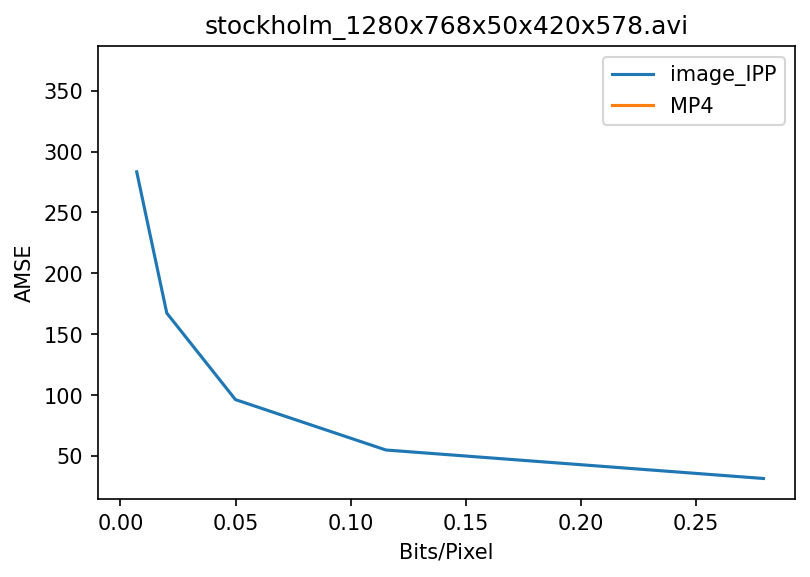

In [45]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
#pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

## Ignore the rest

## Testing `image_IPP_quantized_residue`

`image_IPP_quantized_residue.py` is a modification of `image_IPP.py` where the prediction-error images are quantized before they are compressed with MP4. Each macro-block is quantized to contribute with the same slope to the reconstructed macro-block. 


### Select `image_IPP_quantized_residue` in `RD_curve.py`

!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_quantized_residue as codec\n/\nimport image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [46]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	    import image_IPP as codec
    13	    import image_IPP_adaptive as codec
    15	    import MP4 as codec
    17	import logging
    27	import argparse


!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [47]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [48]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [49]:
# You can see in real-time the output by running "tail -f /tmp/output"
#!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_quantized_residue >&1) | grep BPP | grep Average | cat -n

In [50]:
!grep BPP /tmp/output_image_IPP_quantized_residue | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_quantized_residue.txt

In [51]:
!cat /tmp/image_IPP_quantized_residue.txt

In [52]:
RD_image_IPP_QR = []
with open("/tmp/image_IPP_quantized_residue.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_QR.append((float(rate), float(_distortion)))

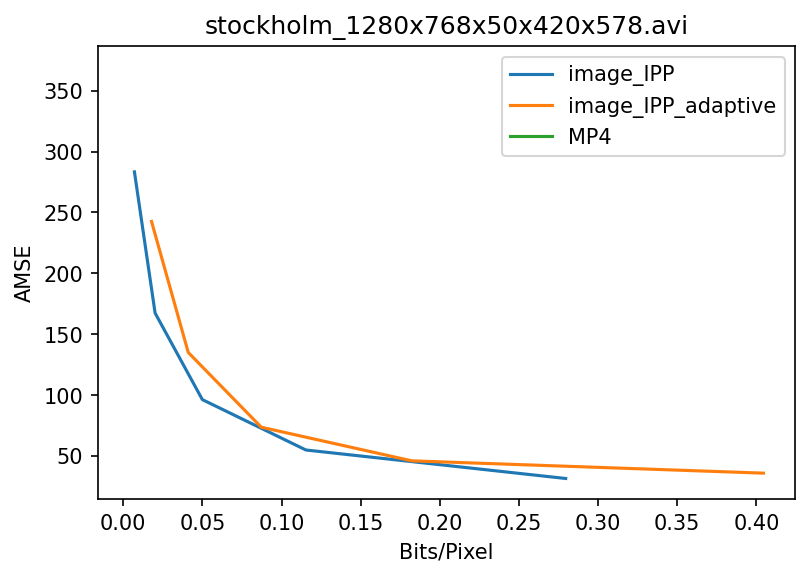

In [53]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

In [54]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

NameError: name 'RD_points_no_intrablocks' is not defined

<Figure size 900x600 with 0 Axes>